In [1]:
import pandas as pd

In [2]:
data = []

In [3]:
# df.head()

In [4]:
data = [pd.read_csv("/content/1.csv"),pd.read_csv("/content/2.csv"),pd.read_csv("/content/3.csv"),pd.read_csv("/content/4.csv"),pd.read_csv("/content/5.csv"),pd.read_csv("/content/6.csv"),pd.read_csv("/content/7.csv"),pd.read_csv("/content/8.csv"),pd.read_csv("/content/9.csv"),pd.read_csv("/content/10.csv")]

In [5]:
import pandas as pd

def timeTaken(data):
    results = []
    for idx, df in enumerate(data, start=1):
        df['word_count'] = df['text'].apply(lambda x: len(x.split()))
        df['duration'] = df['end'] - df['start']
        df['words_per_second'] = df['word_count'] / df['duration']
        average_word_rate = df['words_per_second'].mean()

        results.append({'candidate': f'Candidate {idx}', 'average_word_rate': average_word_rate})

    results_df = pd.DataFrame(results)
    return results_df


results_df = timeTaken(data)
results_df
word_score = results_df.to_csv('word_score.csv', index=False)

In [6]:
data[0].head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,...,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed,word_count,duration,words_per_second
0,0,0,0.00,5.56,"Hello, I am Jeffrey Shepherd and I am current...","[50364, 2425, 11, 286, 669, 1587, 84, 2938, 49...",0.0,-0.447179,1.651235,0.63588,...,0.152281,0.267454,0.846701,0.845698,0.635805,0.647783,2.517986,14,5.56,2.517986
1,1,0,5.56,9.60,IIM Coikode. I have completed my B.Tech in Bi...,"[50642, 286, 6324, 3066, 1035, 1429, 13, 286, ...",0.0,-0.447179,1.651235,0.63588,...,0.189263,0.260410,0.679283,0.733701,0.544145,0.417390,3.217822,13,4.04,3.217822
2,2,0,9.60,14.48,"Technology Kolkata, followed by my M.Tech fro...","[50844, 15037, 26137, 74, 3274, 11, 6263, 538,...",0.0,-0.447179,1.651235,0.63588,...,0.111150,0.248990,0.902729,0.834620,0.715861,0.700062,2.868852,14,4.88,2.868852
3,3,0,14.48,18.48,of three years in the regulatory affairs doma...,"[51088, 295, 1045, 924, 294, 264, 18260, 17478...",0.0,-0.447179,1.651235,0.63588,...,0.399186,0.158919,0.774308,0.813044,0.522462,0.279916,3.750000,15,4.00,3.750000
4,4,0,18.48,23.28,"as a medical writer in Ciro Klein Farm, Mumba...","[51288, 382, 257, 4625, 9936, 294, 383, 5182, ...",0.0,-0.447179,1.651235,0.63588,...,0.532010,0.231735,0.286049,0.561375,0.334381,0.197305,3.541667,17,4.80,3.541667


In [11]:
import pandas as pd

def weightedScore(dataframes):
    # Define the weights for each attribute (constant for all dataframes)
    weights = {
        'positive': 1.0,
        'negative': -0.5,
        'neutral': 0.3,
        'confident': 1.0,
        'hesitant': -0.7,
        'concise': 0.8,
        'enthusiastic': 0.7,
        'speech_speed': 0.5
    }
    results = []

    for i, df in enumerate(dataframes):
        # Normalize the attributes
        df[['positive', 'negative', 'neutral', 'confident', 'hesitant',
            'concise', 'enthusiastic', 'speech_speed']] = df[['positive', 'negative', 'neutral',
            'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].apply(
            lambda x: (x - x.min()) / (x.max() - x.min()))

        # Calculate the weighted score for each candidate
        weighted_score = sum(weights[attr] * df[attr].values[0] for attr in weights)

        # Append the result for each candidate
        results.append({'Candidate': i + 1, 'transcript_Score': weighted_score})

    # Create a DataFrame to store the results and save it as a CSV file
    scores_df = pd.DataFrame(results)
    scores_df.to_csv("score_result.csv", index=False)

    return scores_df

# Example input: assuming 'data' is a list of DataFrames for all candidates
final_scores = weightedScore(data)

print(final_scores)


   Candidate  transcript_Score
0          1          1.826345
1          2          3.810098
2          3          2.012556
3          4          2.328047
4          5          2.385375
5          6          1.896397
6          7          1.827294
7          8          2.185856
8          9          2.602627
9         10          2.477256


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to calculate the weighted score for a specific candidate
def plotCandidateScore(dataframe, candidate_index):
    # Define the weights for each attribute
    weights = {
        'positive': 1.0,
        'negative': -0.5,
        'neutral': 0.3,
        'confident': 1.0,
        'hesitant': -0.7,
        'concise': 0.8,
        'enthusiastic': 0.7,
        'speech_speed': 0.5
    }

    df = dataframe[candidate_index]

    # Normalize the attributes for the selected candidate
    df[['positive', 'negative', 'neutral', 'confident', 'hesitant',
        'concise', 'enthusiastic', 'speech_speed']] = df[['positive', 'negative', 'neutral',
        'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].apply(
        lambda x: (x - x.min()) / (x.max() - x.min()))

    # Calculate the weighted score for the candidate
    weighted_score = sum(weights[attr] * df[attr].values[0] for attr in weights)

    plt.figure(figsize=(10, 6))
    plt.bar(weights.keys(), [df[attr].values[0] for attr in weights], color='lightblue')
    plt.xlabel('Attributes')
    plt.ylabel('Normalized Scores')
    plt.title(f'Attribute Scores for Candidate {candidate_index + 1}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return weighted_score


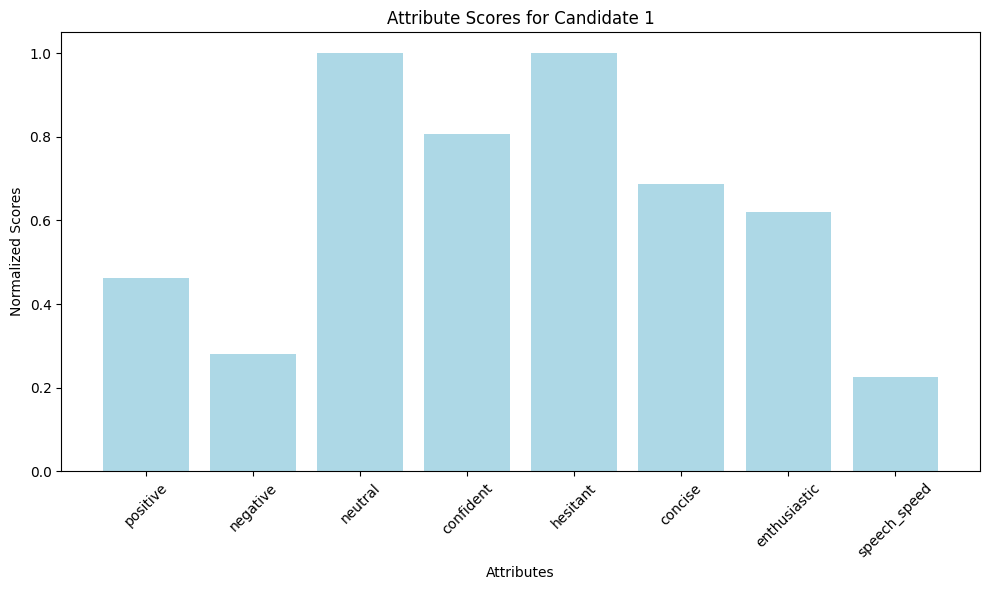

Weighted Score forcandidate 1: 1.8263452084724598


In [13]:
score = plotCandidateScore(data, 0)

print(f'Weighted Score for{"candidate 1"}:', score)

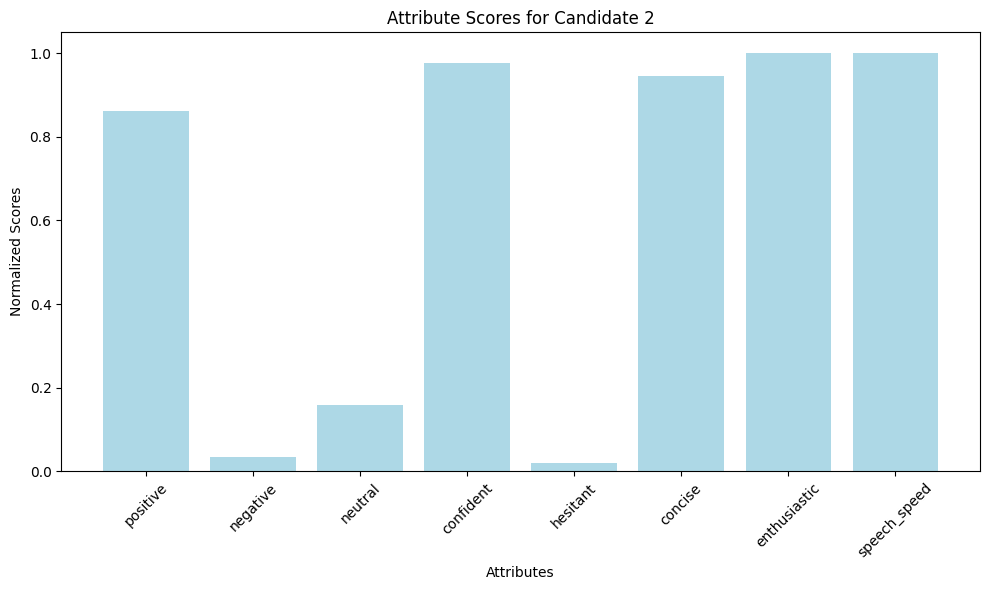

Weighted Score forcandidate 2: 3.8100976274282665


In [14]:
score = plotCandidateScore(data, 1)

print(f'Weighted Score for{"candidate 2"}:', score)

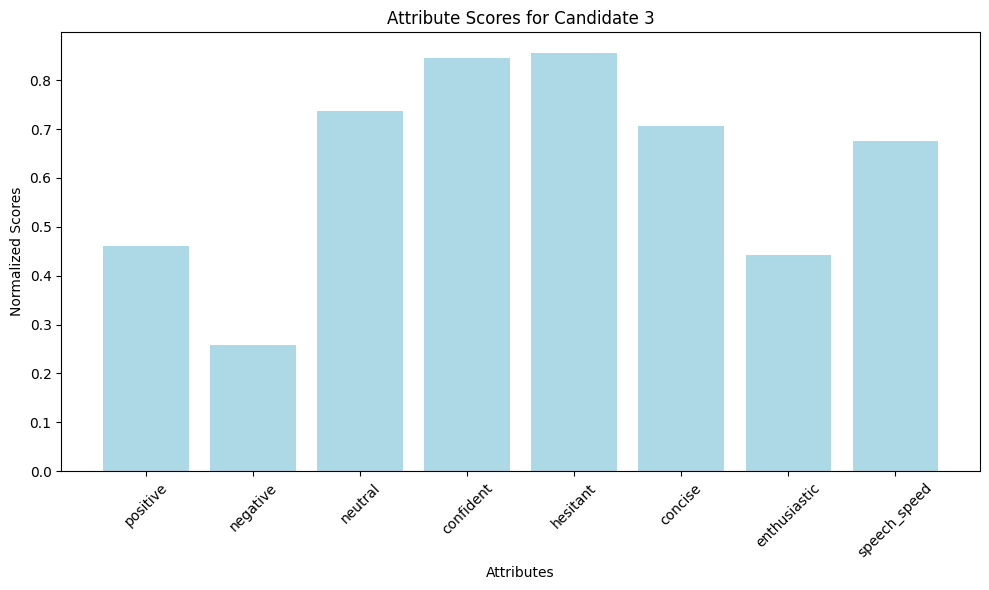

Weighted Score forcandidate 3: 2.0125564439828816


In [15]:
score = plotCandidateScore(data, 2)

print(f'Weighted Score for{"candidate 3"}:', score)

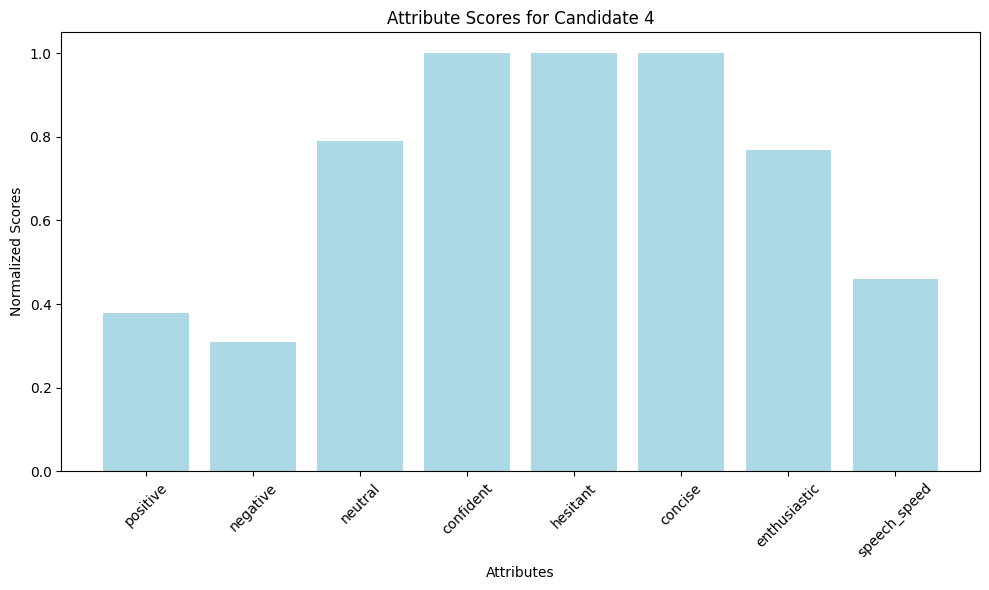

Weighted Score forcandidate 4: 2.328047426806784


In [16]:
score = plotCandidateScore(data, 3)

print(f'Weighted Score for{"candidate 4"}:', score)

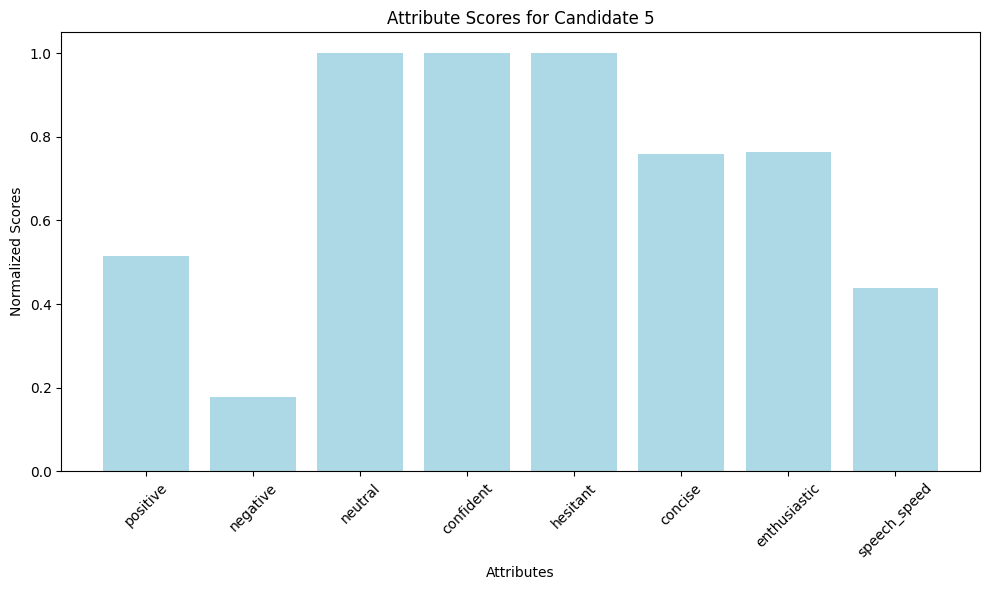

Weighted Score forcandidate 5: 2.385374877526153


In [17]:
score = plotCandidateScore(data, 4)

print(f'Weighted Score for{"candidate 5"}:', score)

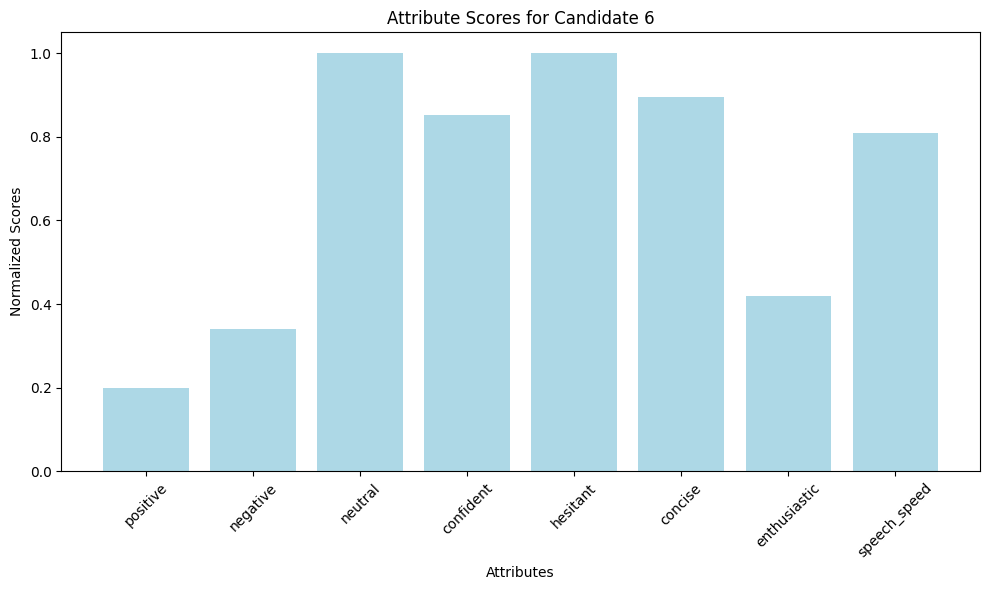

Weighted Score forcandidate 6: 1.8963969858463925


In [18]:
score = plotCandidateScore(data, 5)

print(f'Weighted Score for{"candidate 6"}:', score)

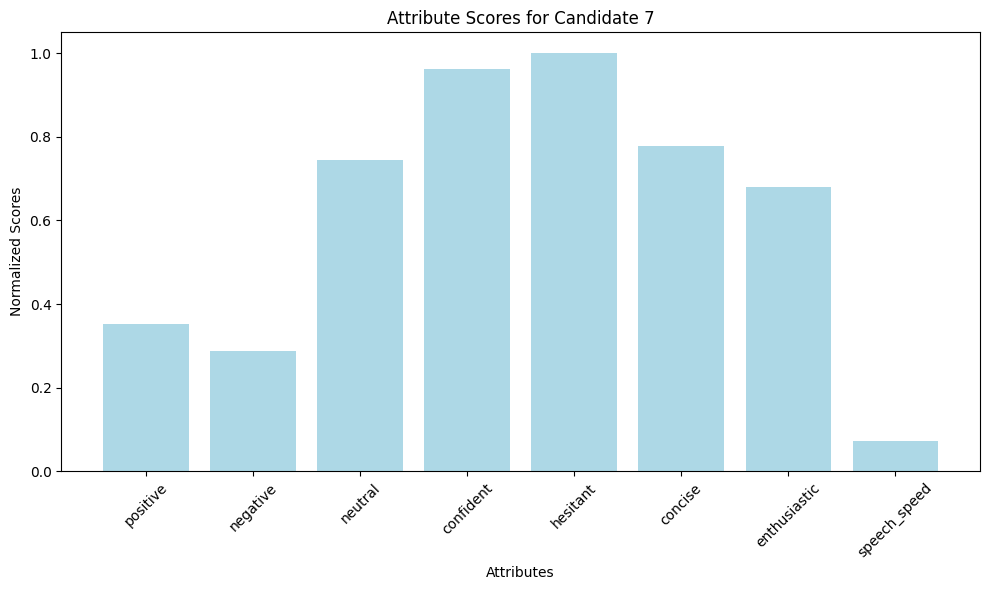

Weighted Score forcandidate 7: 1.8272940855829962


In [19]:
score = plotCandidateScore(data, 6)

print(f'Weighted Score for{"candidate 7"}:', score)

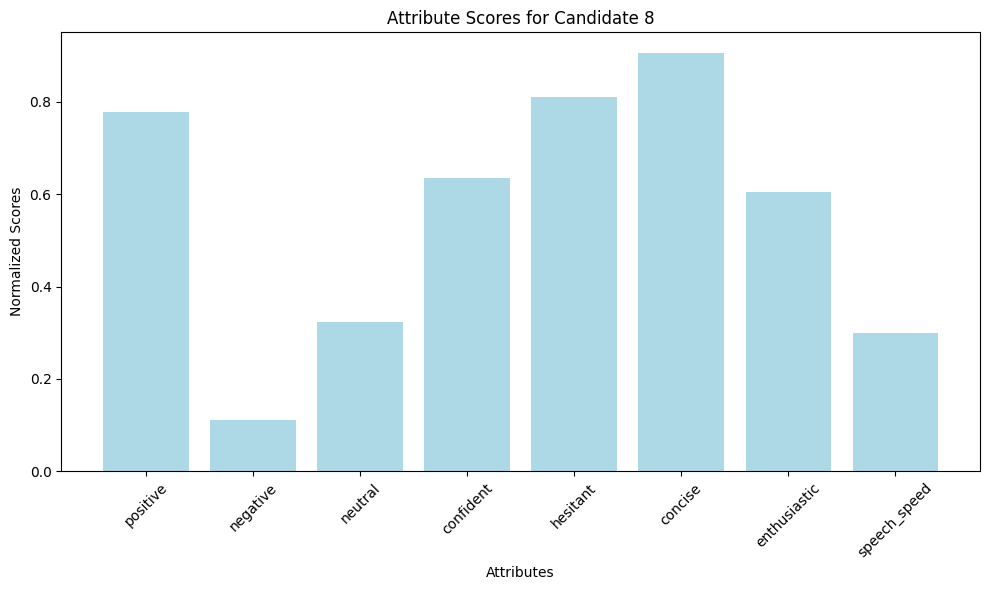

Weighted Score forcandidate 8: 2.1858559612680843


In [20]:
score = plotCandidateScore(data, 7)

print(f'Weighted Score for{"candidate 8"}:', score)

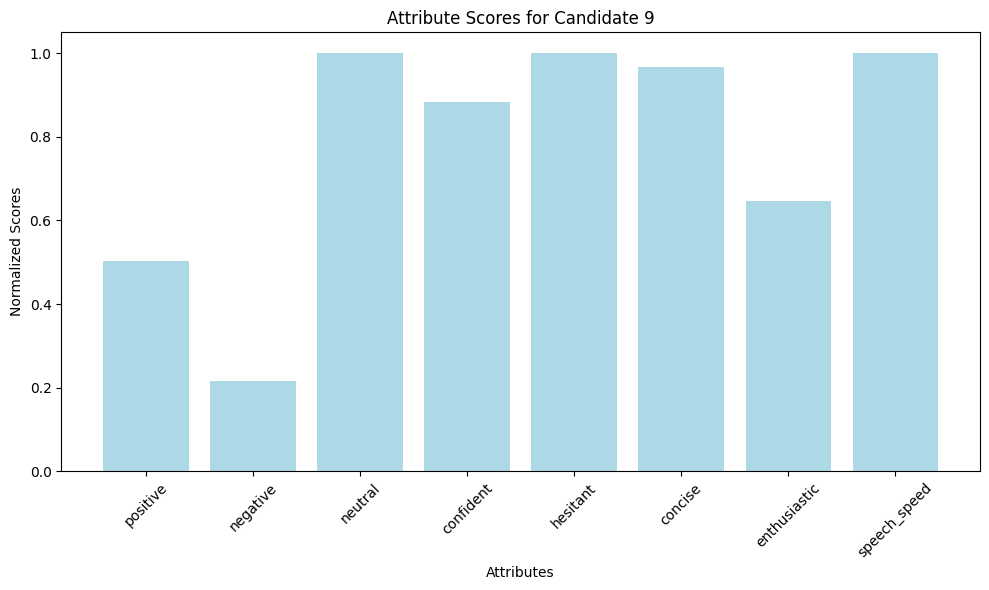

Weighted Score forcandidate 9: 2.6026268639619756


In [21]:
score = plotCandidateScore(data, 8)

print(f'Weighted Score for{"candidate 9"}:', score)

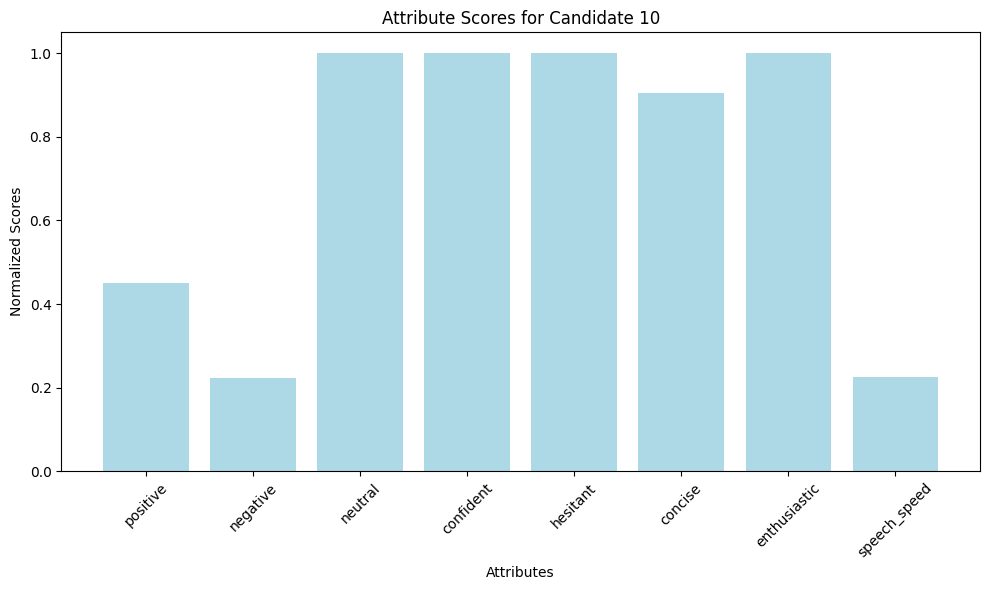

Weighted Score forcandidate 10: 2.4772564405330466


In [22]:
score = plotCandidateScore(data, 9)

print(f'Weighted Score for{"candidate 10"}:', score)